# Linear regression custorm for Diamond price forcasting 

In [33]:
import pandas as pd
import numpy as np

In [34]:
diamond_df = pd.read_csv('diamonds.csv')

In [35]:
diamond_df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [44]:
diamond_df = diamond_df.drop(['Unnamed: 0'], axis=1)

In [45]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [46]:
diamond_df.shape

(53940, 10)

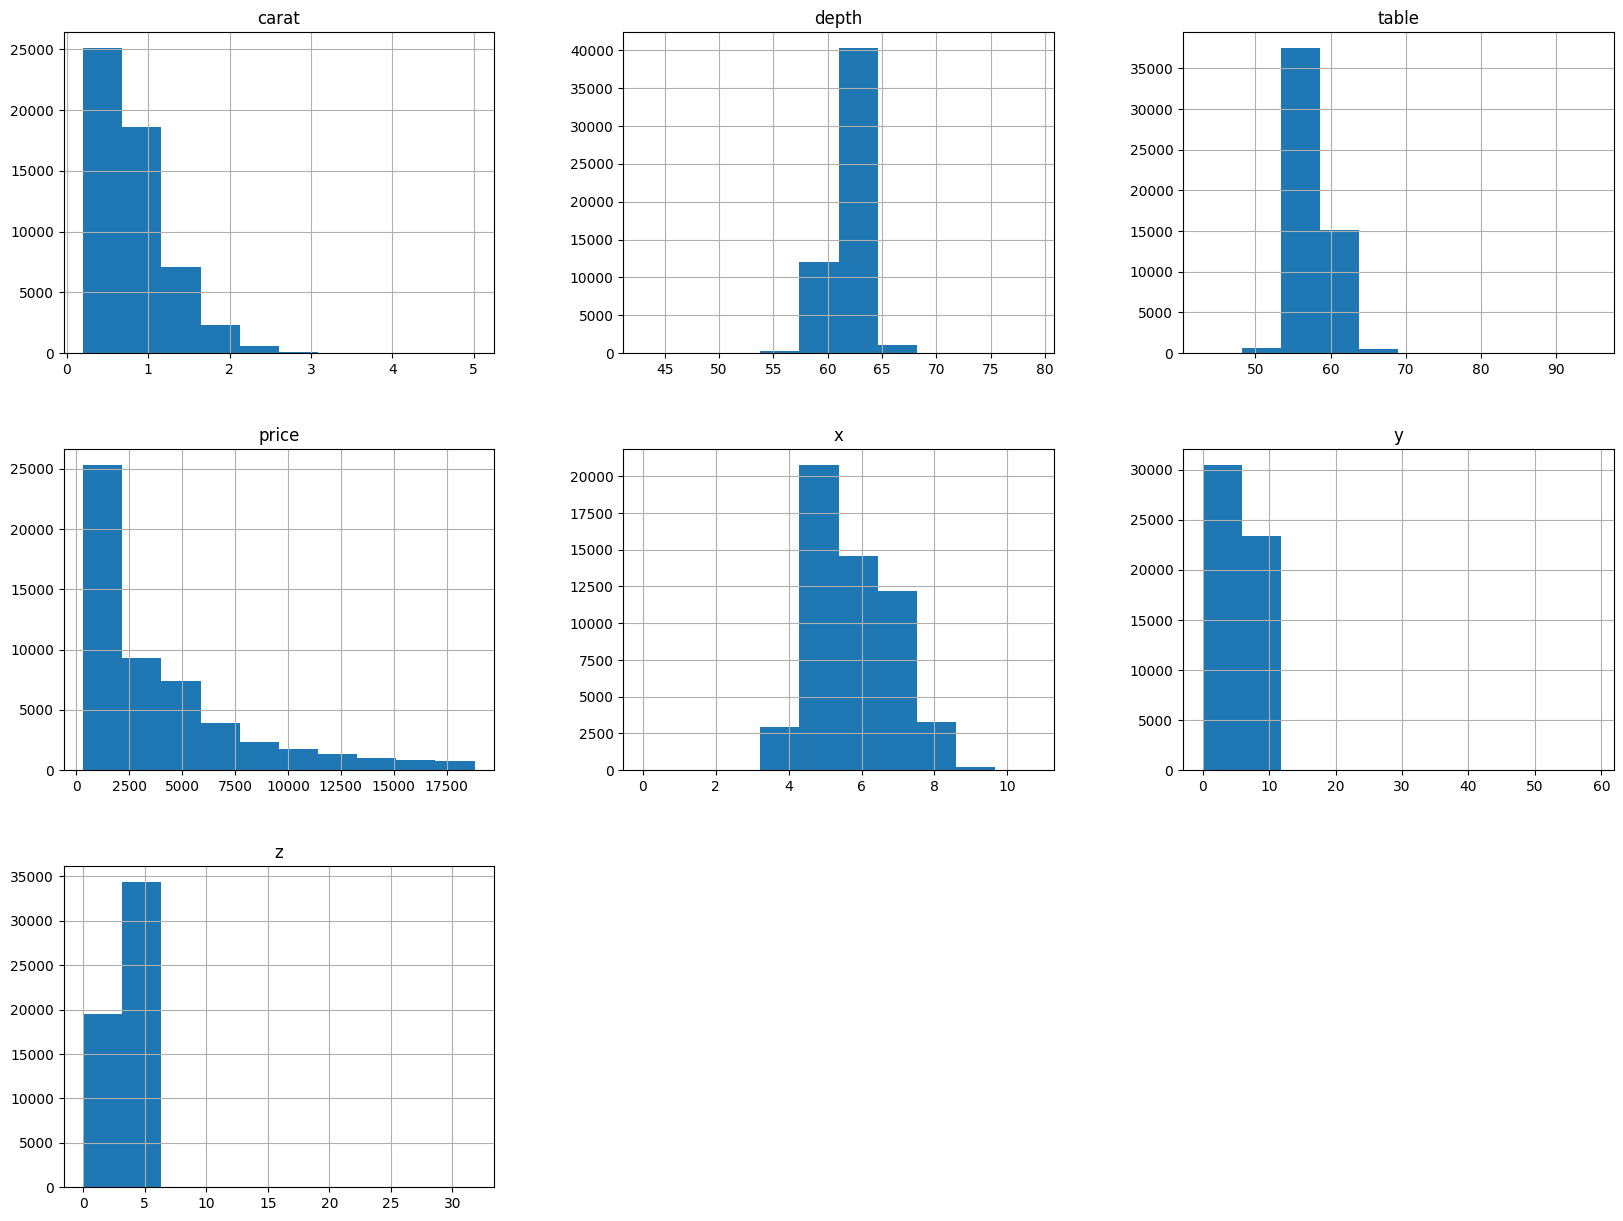

In [47]:
%matplotlib inline
from matplotlib import pyplot as plt

diamond_df.hist(figsize=(20, 15));

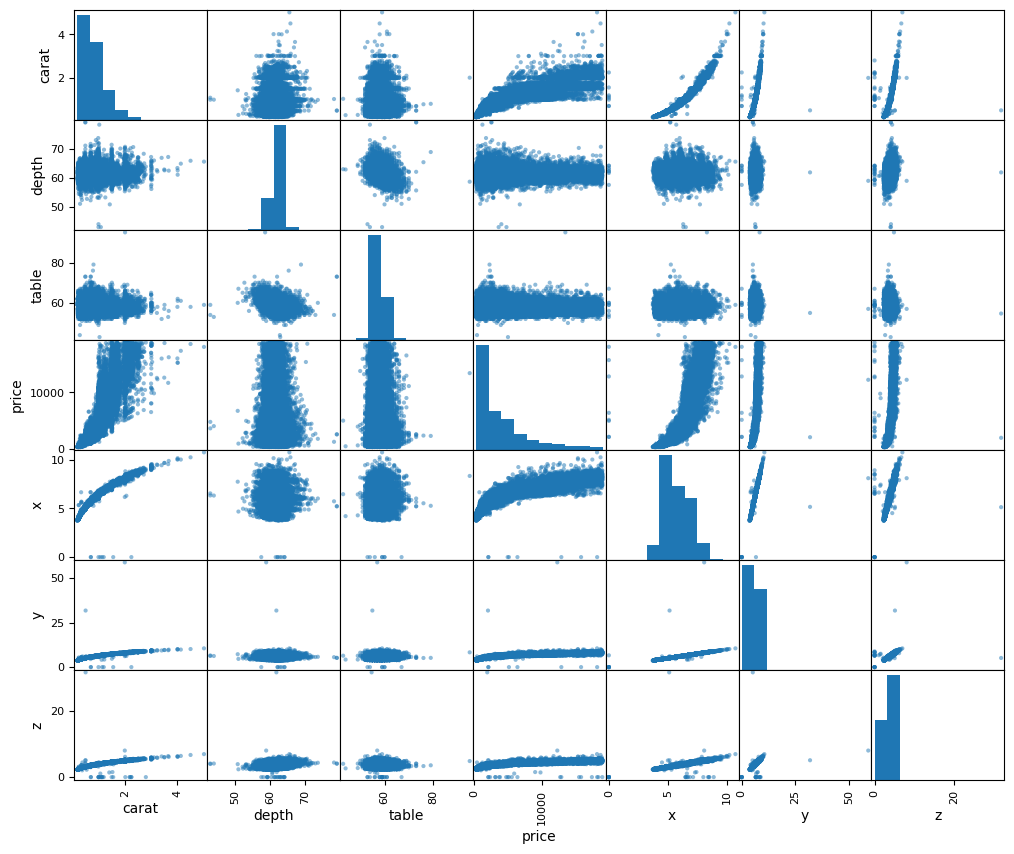

In [48]:
from pandas.plotting import scatter_matrix

scatter_matrix(diamond_df, figsize=(12,10));

In [51]:
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
diamond_df.color = diamond_df.color.map(color_mapping)

In [52]:
# Encoding the ordinal cateogircal variable 'clarity'
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
diamond_df.clarity = diamond_df.clarity.map(clarity_mapping)

In [53]:
# Encode the ordinal categorical variable 'cut'
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
diamond_df.cut = diamond_df.cut.map(cut_mapping)

In [54]:
diamond_df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.904097,3.405803,3.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [55]:
diamond_df = diamond_df.drop(diamond_df[diamond_df["x"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["y"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["z"]==0].index)

In [56]:
#Loại bỏ 1% giá trị lớn hơn phân vị 99% 
diamond_df = diamond_df[diamond_df['depth'] < diamond_df['depth'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['table'] < diamond_df['table'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['x'] < diamond_df['x'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['y'] < diamond_df['y'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['z'] < diamond_df['z'].quantile(0.99)]

In [57]:
diamond_df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48
6,0.24,2,1,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,2,2,2,61.9,55.0,337,4.07,4.11,2.53
8,0.22,0,5,3,65.1,61.0,337,3.87,3.78,2.49
9,0.23,2,2,4,59.4,61.0,338,4.00,4.05,2.39
10,0.30,1,0,2,64.0,55.0,339,4.25,4.28,2.73


In [60]:
X = diamond_df.drop(['price'], axis=1)
y = diamond_df['price']

In [61]:
X_arr = X.to_numpy()
y_arr  = y.to_numpy()

In [62]:
print(X_arr.shape)
print(y_arr.shape)

(51130, 9)
(51130,)


In [63]:
X_train = X_arr[:int(X_arr.shape[0]*0.8)]
y_train = y_arr[:int(X_arr.shape[0]*0.8)]
X_test = X_arr[int(X_arr.shape[0]*0.8):]
y_test = y_arr[int(X_arr.shape[0]*0.8):]

In [64]:
xmean =  X_train.mean(axis = 0)
xstd = X_train.std(axis=0)
X_train = (X_train - xmean)/xstd
X_test = (X_test -  xmean)/xstd

In [65]:
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

In [66]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape )

(40904, 10) (40904,) (10226, 10) (10226,)


In [67]:
N = X_train.shape[0]
n_epochs = 1000
m = 1000
learning_rate = 0.001

# khởi tạo giá trị tham số
theta = np.random.randn(10, 1)
losses = []

for epoch in range(n_epochs):
    for i in range(0, N, m):
        # lấy 1 sample            
        x = X_train[i:i+m, :]       
        y = y_train[i:i+m]
        y = y[:, np.newaxis]

        # predict y_hat
        y_hat = x.dot(theta)
                     
        # compute loss
        loss = np.multiply((y_hat-y), (y_hat-y))
        losses.append(np.mean(loss))
        
        # compute gradient
        k = 2*(y_hat-y)
        gradients = x.T.dot(k)

        # update weights
        theta = theta - learning_rate*(gradients/m)

    print(f"Epoch {epoch+1}/{n_epochs} - Loss: {losses[-1]}")

Epoch 1/1000 - Loss: 2391271.112571886
Epoch 2/1000 - Loss: 2787188.2243446456
Epoch 3/1000 - Loss: 2915311.8273383193
Epoch 4/1000 - Loss: 2843867.432967861
Epoch 5/1000 - Loss: 2647444.7684074612
Epoch 6/1000 - Loss: 2386412.559669386
Epoch 7/1000 - Loss: 2103369.9018228995
Epoch 8/1000 - Loss: 1825595.0333935318
Epoch 9/1000 - Loss: 1568904.8455635535
Epoch 10/1000 - Loss: 1341218.6176584046
Epoch 11/1000 - Loss: 1145343.1445350484
Epoch 12/1000 - Loss: 980972.1640124394


Epoch 13/1000 - Loss: 846044.905281005
Epoch 14/1000 - Loss: 737630.0773119443
Epoch 15/1000 - Loss: 652477.7972483559
Epoch 16/1000 - Loss: 587348.0874099575
Epoch 17/1000 - Loss: 539193.6828403333
Epoch 18/1000 - Loss: 505250.59604046855
Epoch 19/1000 - Loss: 483072.13428382046
Epoch 20/1000 - Loss: 470529.6549626927
Epoch 21/1000 - Loss: 465794.9222148087
Epoch 22/1000 - Loss: 467313.3366311038
Epoch 23/1000 - Loss: 473773.66406924993
Epoch 24/1000 - Loss: 484077.55133852153
Epoch 25/1000 - Loss: 497310.6420604825
Epoch 26/1000 - Loss: 512716.1942327464
Epoch 27/1000 - Loss: 529671.5511328896
Epoch 28/1000 - Loss: 547667.497085223
Epoch 29/1000 - Loss: 566290.3533172898
Epoch 30/1000 - Loss: 585206.5812868737
Epoch 31/1000 - Loss: 604149.6261511641
Epoch 32/1000 - Loss: 622908.7291977084
Epoch 33/1000 - Loss: 641319.4511839547
Epoch 34/1000 - Loss: 659255.6701344758
Epoch 35/1000 - Loss: 676622.8421273845
Epoch 36/1000 - Loss: 693352.3390105339
Epoch 37/1000 - Loss: 709396.701200017

In [68]:
# Đánh giá trên tập test
test_predictions = X_test.dot(theta)
li = np.mean((test_predictions - y_test)*(test_predictions - y_test))
print(f"MSE: {li}")

MSE: 1537479.8007517476


In [69]:
li = np.mean(np.abs(test_predictions - y_test))
print(f"MAE: {li}")

MAE: 955.1099583289903


In [70]:
np.savez('weight.npz', x_mean = xmean, x_std =xstd, theta =theta)

In [71]:
np.savez('data.npz', X_train = X_train, y_train =y_train, X_test = X_test, y_test = y_test)
